## **Latihan Agglomerative Clustering  & DBScan**

- Lakukan EDA untuk memahami dataset.
- Jelaskan mengenai insight yang didapat dari EDA!
<br><br>
- Untuk clustering, drop saja feature 'CustomerID' dan 'Gender'. Dari 3 feature terisisa, pilih kombinasi 2 feature terbaik yang selanjutnya akan digunakan untuk clustering.
- Lakukan scaling menggunakan StandardScaler, lalu gunakan metode K-Means, Agglomerative clustering, dan DBScan. Cari jumlah cluster paling optimal untuk tiap metode.
<br><br>
- Bandingkan hasil dari ketiga metode yang sudah dicoba, manakah metode yang terbaik?
- Interpretasikan hasil clustering-nya!

## **Import libraries**

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_score

from sklearn.cluster import KMeans
from sklearn.cluster import AgglomerativeClustering, DBSCAN
from scipy.cluster.hierarchy import dendrogram, ward, complete, average

import warnings
warnings.filterwarnings('ignore')

## **Load & explore dataset**

In [ ]:
df = pd.read_csv('Mall_Customers.csv')
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
# Rename columns
df = df.rename(columns={'Spending Score (1-100)': 'Spending Score',
        'Annual Income (k$)': 'Annual Income'})

In [ ]:
# Drop customerID column
df.drop('CustomerID', axis=1, inplace=True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Gender          200 non-null    object
 1   Age             200 non-null    int64 
 2   Annual Income   200 non-null    int64 
 3   Spending Score  200 non-null    int64 
dtypes: int64(3), object(1)
memory usage: 6.4+ KB


In [ ]:
df.describe()

,Age,Annual Income,Spending Score
count,200.000000,200.000000,200.000000
mean,38.850000,60.560000,50.200000
std,13.969007,26.264721,25.823522
min,18.000000,15.000000,1.000000
25%,28.750000,41.500000,34.750000
50%,36.000000,61.500000,50.000000
75%,49.000000,78.000000,73.000000
max,70.000000,137.000000,99.000000


In [ ]:
df.isna().sum()

Gender            0
Age               0
Annual Income     0
Spending Score    0
dtype: int64

## **EDA**

In [ ]:
SMALL_SIZE = 10
MEDIUM_SIZE = 12
BIGGER_SIZE = 15

plt.rc('font', size=SMALL_SIZE)          # controls default text sizes
plt.rc('axes', titlesize=SMALL_SIZE)     # fontsize of the axes title
plt.rc('axes', labelsize=MEDIUM_SIZE)    # fontsize of the x and y labels
plt.rc('xtick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('ytick', labelsize=MEDIUM_SIZE)    # fontsize of the tick labels
plt.rc('legend', fontsize=SMALL_SIZE)    # legend fontsize
plt.rc('figure', titlesize=BIGGER_SIZE)  # fontsize of the figure title

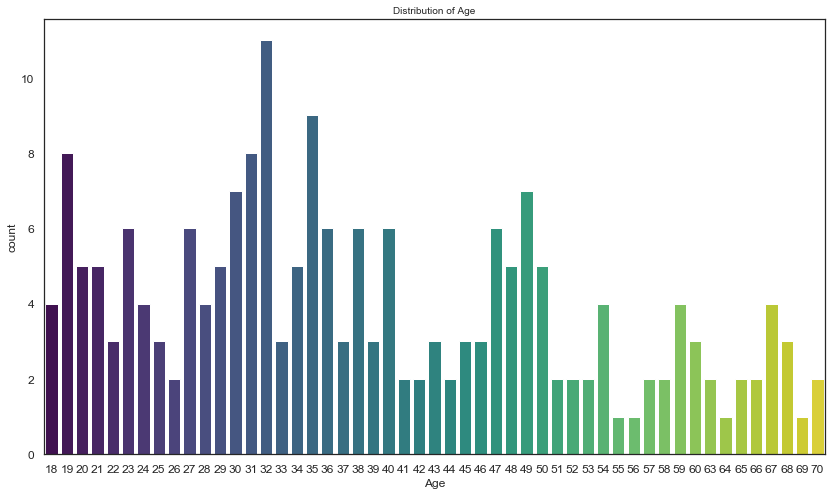

In [ ]:
plt.figure(figsize=(14, 8))
sns.countplot(df['Age'], palette = 'viridis')
plt.title('Distribution of Age');

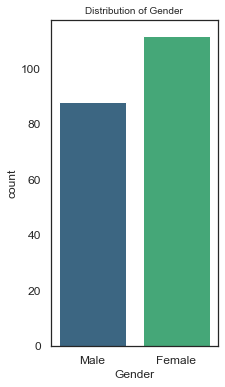

In [ ]:
plt.figure(figsize=(3, 6))
sns.countplot(df['Gender'], palette = 'viridis')
plt.title('Distribution of Gender');

In [ ]:
df['Gender'].value_counts()/df.shape[0]*100

Female    56.0
Male      44.0
Name: Gender, dtype: float64

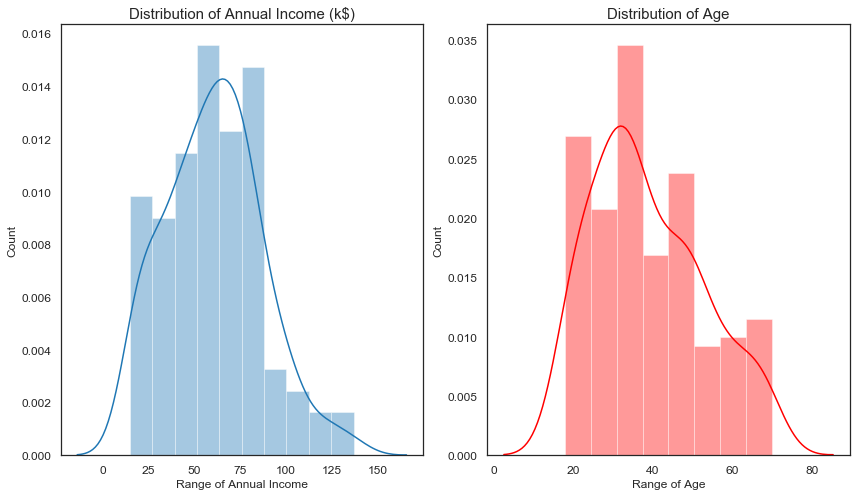

In [ ]:
plt.figure(figsize=(12, 7))

plt.subplot(1, 2, 1)
sns.distplot(df['Annual Income'])
plt.title('Distribution of Annual Income (k$)', fontsize = 15)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')


plt.subplot(1, 2, 2)
sns.distplot(df['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 15)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.tight_layout();

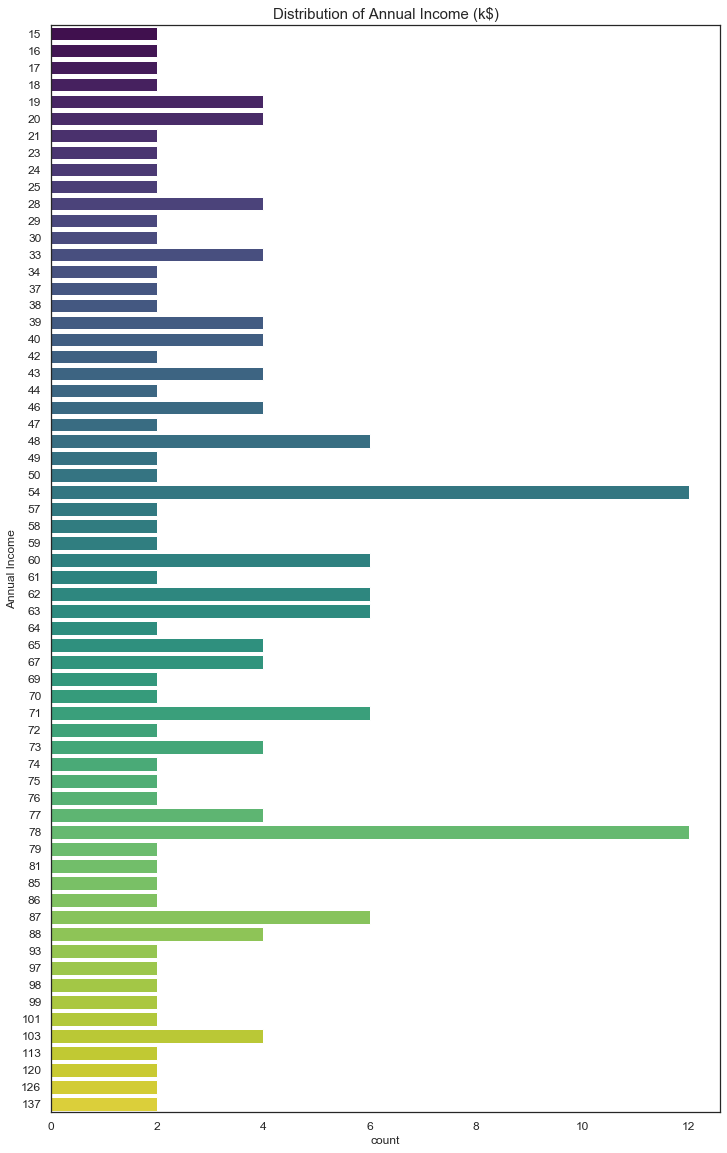

In [ ]:
plt.figure(figsize=(12, 20))
sns.countplot(y='Annual Income', data=df, palette='viridis')
plt.title('Distribution of Annual Income (k$)', fontsize = 15);

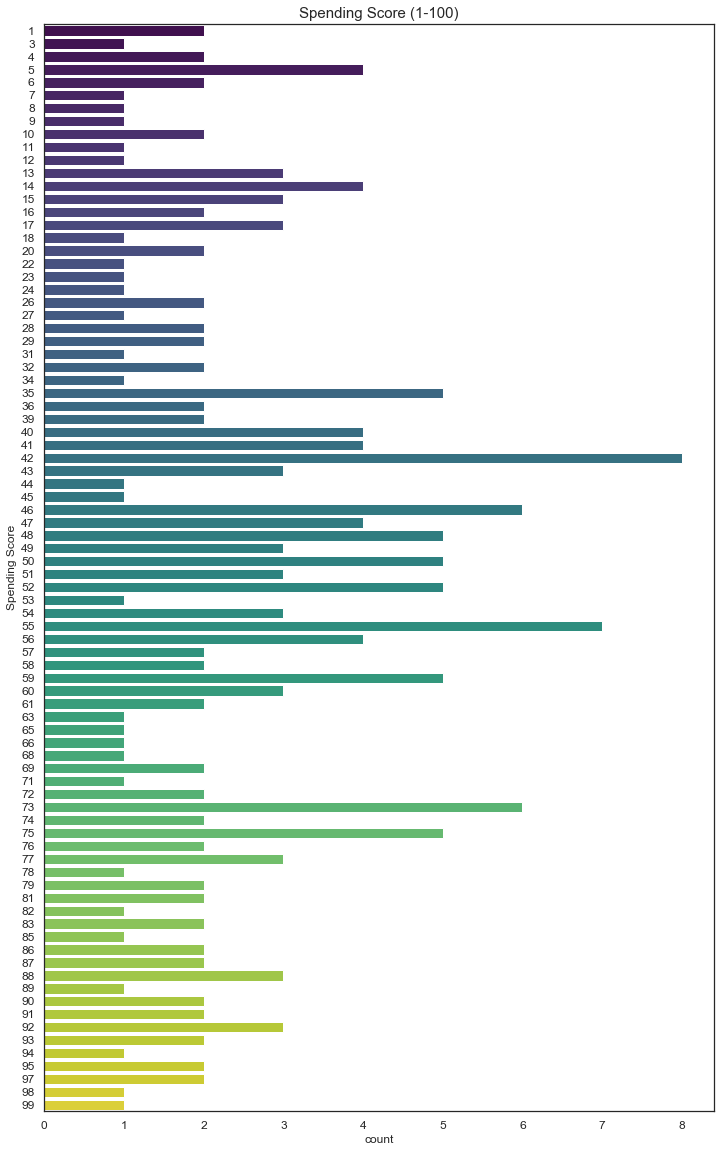

In [ ]:
plt.figure(figsize=(12, 20))
sns.countplot(y='Spending Score', data=df, palette='viridis')
plt.title('Spending Score (1-100)', fontsize = 15);

### **Age vs Annual Income**

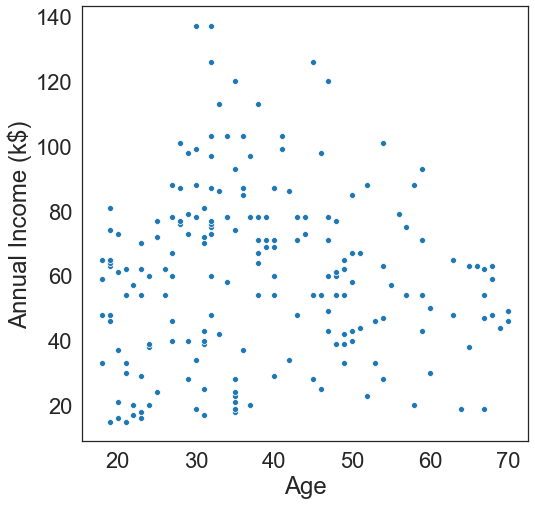

In [ ]:
plt.figure(figsize = (8, 8))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'Age',
    y = 'Annual Income',
    data = df)

plt.xlabel('Age')
plt.ylabel('Annual Income (k$)');

### **Age vs Spending Score**

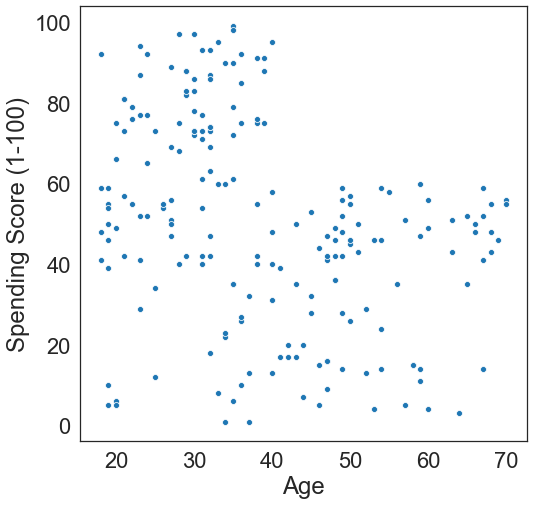

In [ ]:
plt.figure(figsize = (8, 8))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'Age',
    y = 'Spending Score',
    data = df)

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)');

### **Annual Income vs Spending Score**

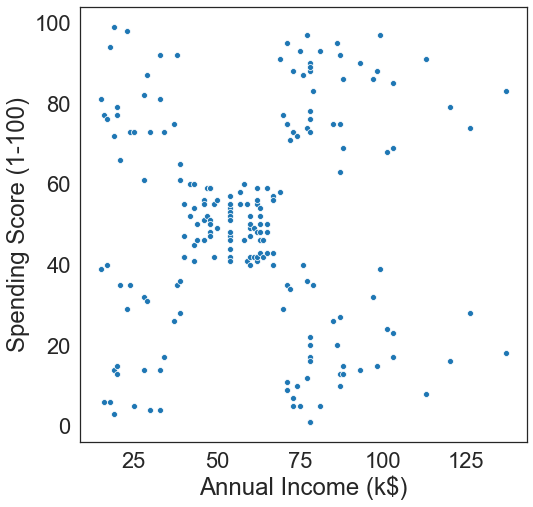

In [ ]:
plt.figure(figsize = (8, 8))
sns.set_context(context = 'notebook', font_scale=2)
sns.scatterplot(
    x = 'Annual Income',
    y = 'Spending Score',
    data = df)

plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)');

## **Clustering**

Untuk tujuan clustering dengan metode yang akan digunakan, feature 'Gender' akan didrop karena merupakan categorical feature.

In [ ]:
df = df.drop(columns='Gender', axis=1)
df.head()

,Age,Annual Income,Spending Score
0,19,15,39
1,21,15,81
2,20,16,6
3,23,16,77
4,31,17,40


## **Finding the best features combination**
Kita akan mencoba memilih 2 features untuk clustering, dengan tujuan mempermudah visualisasi.

## **Scaling**

In [ ]:
scaler = StandardScaler()
df_scaled = scaler.fit_transform(df)

df_scaled = pd.DataFrame(df_scaled, columns=['Age', 'Annual Income', 'Spending Score'])
df_scaled

,Age,Annual Income,Spending Score
0,-1.424569,-1.738999,-0.434801
1,-1.281035,-1.738999,1.195704
2,-1.352802,-1.700830,-1.715913
3,-1.137502,-1.700830,1.040418
4,-0.563369,-1.662660,-0.395980
...,...,...,...
195,-0.276302,2.268791,1.118061
196,0.441365,2.497807,-0.861839
197,-0.491602,2.497807,0.923953
198,-0.491602,2.917671,-1.250054


* https://docs.python.org/3/library/itertools.html#itertools.combinations

In [ ]:
# mencari kombinasi feature terbaik dengan KMeans

import itertools

silhouette = []
score = 0
thislist = ['Age', 'Annual Income', 'Spending Score']

for i in itertools.combinations(thislist, 2):

    kmeans = KMeans(n_clusters=2)
    kmeans.fit(df_scaled[list(i)])
    labels = kmeans.labels_
    sil = silhouette_score(df_scaled[list(i)], labels, metric = 'euclidean')
    silhouette.append(sil)

    if score < sil:
        best_combination = i
        score = sil

    print(sil, i)

print()
print('best features combinantion is', best_combination, 'with silhouette score:', score)

0.3706886243538429 ('Age', 'Annual Income')
0.47212716430695223 ('Age', 'Spending Score')
0.29512063001659344 ('Annual Income', 'Spending Score')

best features combinantion is ('Age', 'Spending Score') with silhouette score: 0.47212716430695223


In [ ]:
# mencari kombinasi feature terbaik dengan KMeans

X = df[['Annual Income', 'Spending Score']]
X2 = df[['Age', 'Spending Score']]
X3 = df[['Age', 'Annual Income']]

cluster_list = [X, X2, X3]

for i in cluster_list:
    kmeans = KMeans(n_clusters=2)
    kmeans.fit(i)
    labels = kmeans.labels_
    print('Silhoutte score:', silhouette_score(i, labels, metric = 'euclidean'),'\t', i.columns)
    kmeans.labels_ = 'cluster', i

Silhoutte score: 0.2918426367691145 	 Index(['Annual Income', 'Spending Score'], dtype='object')
Silhoutte score: 0.4692341232501655 	 Index(['Age', 'Spending Score'], dtype='object')
Silhoutte score: 0.42620850066216065 	 Index(['Age', 'Annual Income'], dtype='object')


Karena nilai silhouette score antara 'Age' dan 'Spending Score' paling tinggi, untuk mempermudah visualisasi, maka untuk proses clustering selanjutnya hanya akan digunakan 2 feature ini.

In [ ]:
X_scaled = df_scaled[['Age', 'Spending Score']]
X_scaled

,Age,Spending Score
0,-1.424569,-0.434801
1,-1.281035,1.195704
2,-1.352802,-1.715913
3,-1.137502,1.040418
4,-0.563369,-0.395980
...,...,...
195,-0.276302,1.118061
196,0.441365,-0.861839
197,-0.491602,0.923953
198,-0.491602,-1.250054


## **K-Means**

### **Elbow method**

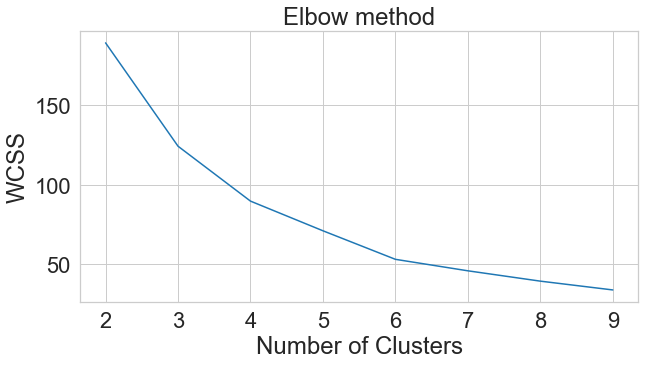

In [ ]:
# model
kmeans_models = [KMeans(n_clusters=k, random_state=0).fit(X_scaled) for k in range (2, 10)]

# inertia (WCSS)
inertia = [model.inertia_ for model in kmeans_models]

sns.set_style(style='whitegrid')
plt.figure(figsize=(10, 5))

plt.plot(range(2, 10), inertia)

plt.title('Elbow method')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS');

### **Silhouette method**

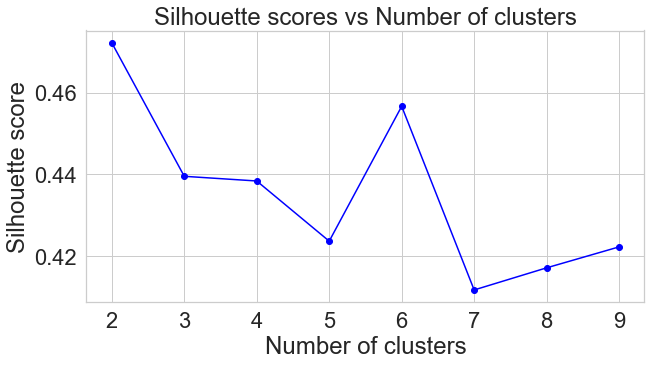

In [ ]:
# Silhouette score
silhoutte = [silhouette_score(X_scaled, model.labels_) for model in kmeans_models]

plt.figure(figsize=(10, 5))

plt.plot(range(2, 10), silhoutte, 'bo-')

plt.xticks(list(np.arange(2,10)))
plt.title('Silhouette scores vs Number of clusters')
plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score');

In [ ]:
silhouette_scores = []
number_of_cluster = range(2, 10)

for i in number_of_cluster:
    kmeans = KMeans(n_clusters=i, random_state=0)
    kmeans.fit(X_scaled)

    labels = kmeans.labels_
    silhouette_scores.append(silhouette_score(X_scaled, labels, metric = 'euclidean', random_state=0))

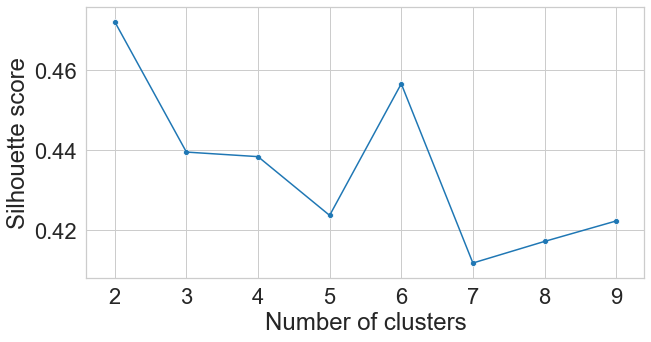

In [ ]:
plt.figure(figsize=(10,5))

sns.lineplot(number_of_cluster, silhouette_scores)
sns.scatterplot(number_of_cluster, silhouette_scores)

plt.xticks(number_of_cluster)

plt.xlabel('Number of clusters')
plt.ylabel('Silhouette score');

### **Interpretasi**

Silhouette score tertinggi didapat dengan jumlah cluster = 2.

In [ ]:
kmeans = KMeans(n_clusters=2)
kmeans.fit(X_scaled)

KMeans(n_clusters=2)

In [ ]:
kmeans.labels_

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1,
       1, 0, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0,
       1, 0])

In [ ]:
df['kmeans'] = kmeans.labels_
df

,Age,Annual Income,Spending Score,kmeans
0,19,15,39,0
1,21,15,81,0
2,20,16,6,1
3,23,16,77,0
4,31,17,40,0
...,...,...,...,...
195,35,120,79,0
196,45,126,28,1
197,32,126,74,0
198,32,137,18,1


In [ ]:
print('Silhouette score K-Means:', silhouette_score(X_scaled, kmeans.labels_))

Silhouette score K-Means: 0.47212716430695223


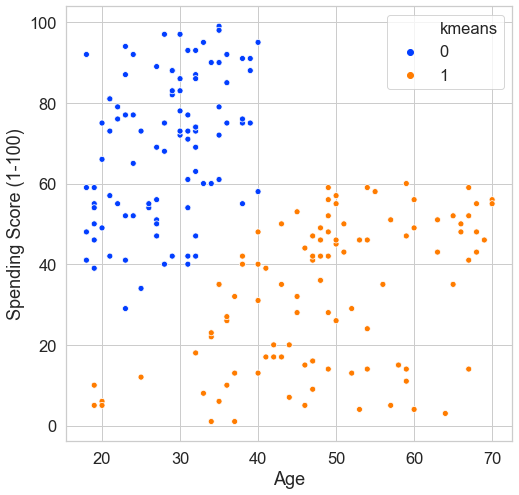

In [ ]:
# Plotting the result
plt.figure(figsize = (8, 8) )
sns.set_context(context = 'notebook', font_scale=1.5)
sns.scatterplot(
    x = 'Age',
    y = 'Spending Score',
    hue = 'kmeans',
    data = df,
    palette='bright')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)');

## **Agglomerative clustering**

Objective:
- Data point dalam satu cluster karakternya mirip
- Antar cluster karakternya berbeda

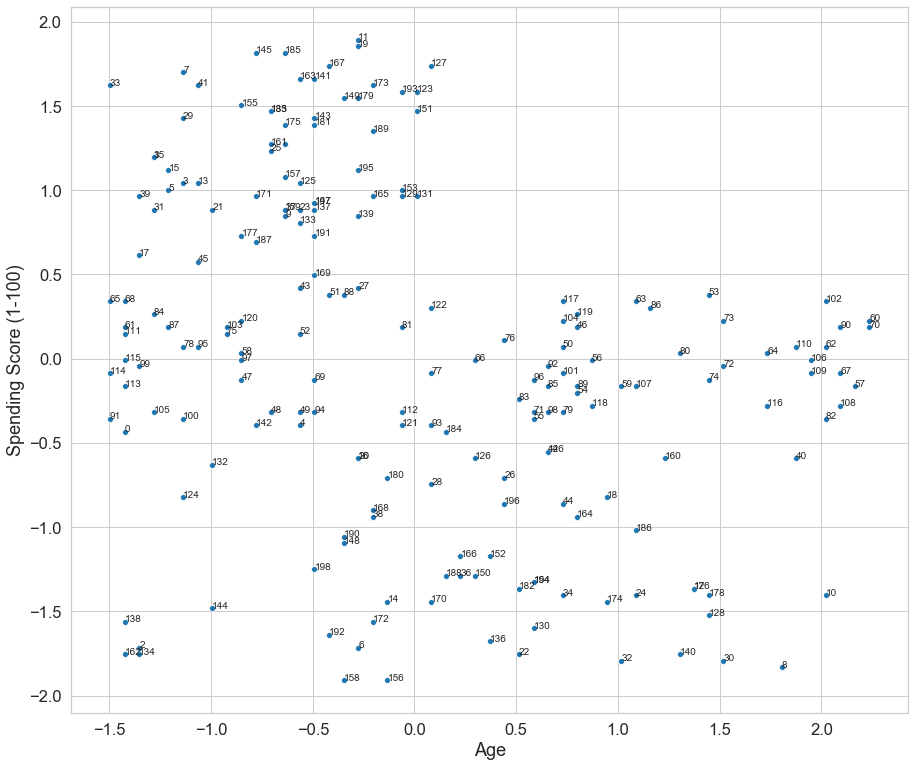

In [ ]:
# scatterplot Age vs Spending Score
plt.figure(figsize=(15, 13))
sns.scatterplot(x='Age', y='Spending Score', data=X_scaled)
plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

# memberi nomor pada tiap data point
for i,txt in enumerate(range(0,X_scaled.shape[0]-1)):
    plt.annotate(txt, (X_scaled['Age'][i], X_scaled['Spending Score'][i]), fontsize=10)

### **Ward**
Menggabungkan 2 cluster dengan variance terkecil (paling seragam)

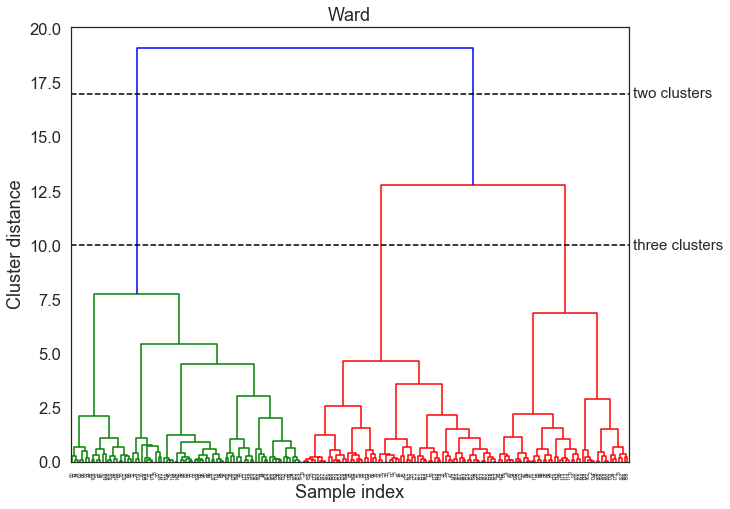

In [ ]:
# Hierrchical clustering dengan linkage ward
linkage_array = ward(X_scaled)

plt.figure(figsize = (10, 8))
sns.set_style(style='white')

dendrogram(linkage_array, 25)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [17, 17], '--', c='k')
ax.plot(bounds, [10, 10], '--', c='k')
ax.text(bounds[1], 17, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 10, ' three clusters', va='center', fontdict={'size': 15})
plt.title('Ward')
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');

**Perubahan jarak**
- 2-3 = 6
- 3-4 = 5
- 4-5 = 0.5

**Hasil: 2 clusters paling optimal**

### **Complete**
Menghitung jarak antar data point terjauh pada cluster berbeda, lalu menyatukan yg jaraknya paling kecil

\* sensitif terhadap outliers

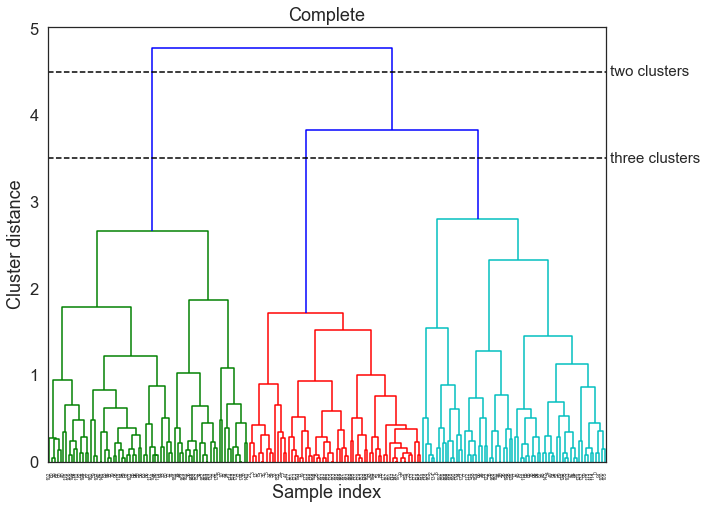

In [ ]:
# Hierrchical clustering dengan linkage complete
linkage_array = complete(X_scaled)

plt.figure(figsize = (10, 8))
sns.set_style(style='white')

dendrogram(linkage_array, 25)

ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [4.5, 4.5], '--', c='k')
ax.plot(bounds, [3.5, 3.5], '--', c='k')
ax.text(bounds[1], 4.5, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 3.5, ' three clusters', va='center', fontdict={'size': 15})
plt.title('Complete')
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');

**Perubahan jarak**
- 2-3 = 1
- 3-4 = 1.2
- 4-5 = 0.2

**Hasil: 3 clusters paling optimal**

### **Average**
Menghitung jarak antara tiap data point ke data point di cluster lainnya, kemudian dirata-ratakan. Kemudian dicari yg nilainya paling kecil

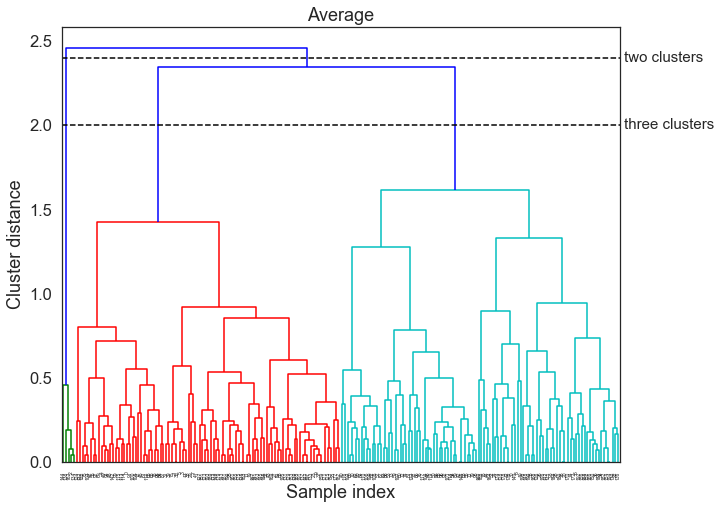

In [ ]:
# Hierrchical clustering dengan linkage average
linkage_array = average(X_scaled)

plt.figure(figsize = (10, 8))
sns.set_style(style='white')

dendrogram(linkage_array, 25)
ax = plt.gca()
bounds = ax.get_xbound()
ax.plot(bounds, [2.4, 2.4], '--', c='k')
ax.plot(bounds, [2, 2], '--', c='k')
ax.text(bounds[1], 2.4, ' two clusters', va='center', fontdict={'size': 15})
ax.text(bounds[1], 2, ' three clusters', va='center', fontdict={'size': 15})
plt.title('Average')
plt.xlabel('Sample index')
plt.ylabel('Cluster distance');

**Perubahan jarak**
- 2-3 = 0.1
- 3-4 = 0.6
- 4-5 = 0.3

**Hasil: 3 clusters paling optimal**

### **Results comparison**

**Pemilihan Jumlah Cluster**

- Pemilihan jumlah cluster pada agglomerative clustering dapat dipilih secara subjective (berdasarkan domain knowledge), atau dengan pendekatan memilih perubahan jarak terbesar.

- Dari visualisasi dendrogram pada 3 metode di atas, kita mendapatkan kandidat metode dan cluster:
    - Ward: 2 cluster
    - Complete: 3 cluster
    - Average: 3 cluster
    
<br>

- Dari 3 metode linkage yang digunakan dari Hierarchical Clustering pada dataset ini, menunjukkan jumlah cluster terbaik adalah 2 atau 3 cluster.
- Coba dengan silhouette score, manakah metode dan berapa cluster-kah yang terbaik?

In [ ]:
# Comparison of 2 clusters

agg_ward = AgglomerativeClustering(n_clusters=2, linkage='ward')
df['Ward2'] = agg_ward.fit_predict(X_scaled)

agg_complete = AgglomerativeClustering(n_clusters=2, linkage='complete')
df['Complete2'] = agg_complete.fit_predict(X_scaled)

agg_average = AgglomerativeClustering(n_clusters=2, linkage='average')
df['Average2'] = agg_average.fit_predict(X_scaled)

df.head()

,Age,Annual Income,Spending Score,kmeans,Ward2,Complete2,Average2
0,19,15,39,0,0,0,0
1,21,15,81,0,0,0,0
2,20,16,6,1,0,0,1
3,23,16,77,0,0,0,0
4,31,17,40,0,0,0,0


In [ ]:
print('Silhouette score ward 2 clusters:', silhouette_score(X_scaled, df['Ward2']))
print('Silhouette score complete 2 clusters:', silhouette_score(X_scaled, df['Complete2']))
print('Silhouette score average 2 clusters:', silhouette_score(X_scaled, df['Average2']))

Silhouette score ward 2 clusters: 0.41449964268829986
Silhouette score complete 2 clusters: 0.4041329673080877
Silhouette score average 2 clusters: 0.25121185339433993


In [ ]:
# Comparison of 3 clusters

agg_ward = AgglomerativeClustering(n_clusters=3, linkage='ward')
df['Ward3'] = agg_ward.fit_predict(X_scaled)

agg_complete = AgglomerativeClustering(n_clusters=3, linkage='complete')
df['Complete3'] = agg_complete.fit_predict(X_scaled)

agg_average = AgglomerativeClustering(n_clusters=3, linkage='average')
df['Average3'] = agg_average.fit_predict(X_scaled)

df.head()

,Age,Annual Income,Spending Score,kmeans,Ward2,Complete2,Average2,Ward3,Complete3,Average3
0,19,15,39,0,0,0,0,1,0,2
1,21,15,81,0,0,0,0,2,2,2
2,20,16,6,1,0,0,1,1,0,1
3,23,16,77,0,0,0,0,2,2,2
4,31,17,40,0,0,0,0,1,0,2


In [ ]:
print('Silhouette score ward 3 clusters:', silhouette_score(X_scaled, df['Ward3']))
print('Silhouette score complete 3 clusters:', silhouette_score(X_scaled, df['Complete3']))
print('Silhouette score average 3 clusters:', silhouette_score(X_scaled, df['Average3']))

Silhouette score ward 3 clusters: 0.4166414852049989
Silhouette score complete 3 clusters: 0.4079690187077007
Silhouette score average 3 clusters: 0.4189434186450015


In [ ]:
pd.DataFrame({'Total Cluster': ['2 Clusters', '3 Clusters'],
    'Ward': [silhouette_score(X_scaled, df['Ward2']), silhouette_score(X_scaled, df['Ward3'])],
    'Complete': [silhouette_score(X_scaled, df['Complete2']), silhouette_score(X_scaled, df['Complete3'])],
    'Average': [silhouette_score(X_scaled, df['Average2']), silhouette_score(X_scaled, df['Average3'])]
})

,Total Cluster,Ward,Complete,Average
0,2 Clusters,0.414500,0.404133,0.251212
1,3 Clusters,0.416641,0.407969,0.418943


In [ ]:
print('Silhouette score Hierarchical Clustering with Average Linkage 3 cluster:', silhouette_score(X_scaled, df['Average3']))

Silhouette score Hierarchical Clustering with Average Linkage 3 cluster: 0.4189434186450015


### **Interpretasi**

Berdasarkan metode hierarchical/agglomerative clustering, didapat bahwa linkage average dengan jumlah 3 clusters adalah yang paling optimal untuk segmentasi customer pada kasus ini.

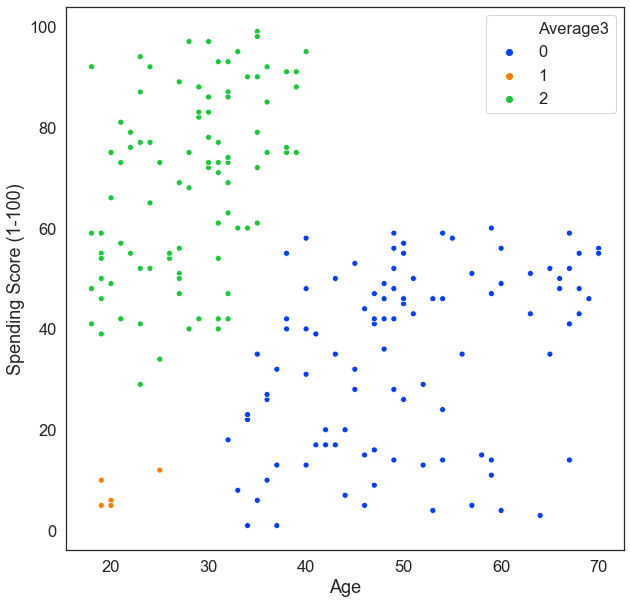

In [ ]:
# Plot Average
plt.figure(figsize = (10, 10))
sns.set_context(context = 'notebook', font_scale=1.5)
sns.scatterplot(
    x = 'Age',
    y = 'Spending Score',
    hue = 'Average3',
    data = df,
    palette='bright')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)');

## **DBScan**

Pros of DBSCAN
- Tidak perlu menentukan jumlah cluster di awal
- Dapat mengetahui outliers
- Dapat menangkap pola tertentu (tidak beraturan)

Cons of DBSCAN
- Sulit mengidentifikasi cluster pada data yang densitynya terlalu bervariasi
- Kurang baik pada high dimensional data
- Sensitif terhadap epsilon dan min_samples

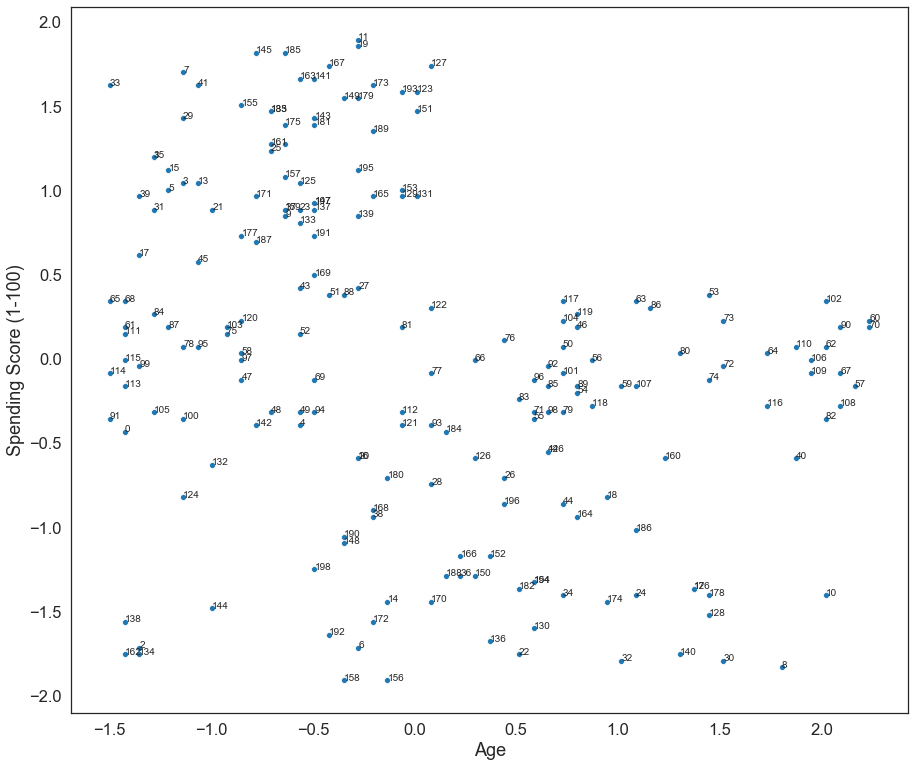

In [ ]:
plt.figure(figsize=(15, 13))
sns.scatterplot(x='Age', y='Spending Score', data=X_scaled)

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)')

for i,txt in enumerate(range(0,X_scaled.shape[0]-1)):
    plt.annotate(txt, (X_scaled['Age'][i], X_scaled['Spending Score'][i]), fontsize=10)

**Optimizing epsilon & min_samples**

In [ ]:
dbscan = DBSCAN(eps=0.2, min_samples=3)
labels = dbscan.fit_predict(X_scaled)
labels

array([ 0,  1,  2,  1,  3,  1,  4, -1, -1,  5, -1,  5,  6,  1,  4,  1,  7,
       -1, 19,  5,  7,  1,  8,  5, -1,  5,  9, 10, -1, -1, -1,  1, -1, -1,
       11,  1, 12,  5, 13,  1, -1, -1, -1, 10, 19, -1, 14, 15,  3,  3, 14,
       10, -1, -1, 14, 14, 14, 16, 15, 14, 16, 15, 16, -1, 16, 15, -1, 16,
       15,  3, 16, 14, -1, -1, -1, 15, -1, -1, 15, 14, -1, -1, 16, 14, 15,
       14, -1, 15, 10, 14, 16,  0, 14, 17,  3, 15, 14, 15, 14, 15,  0, 14,
       16, 15, 14,  0, 16, 14, 16, 16, 16, 15, 17, 15, 15, 15, -1, 14, 14,
       14, 15, 17, -1,  5, -1,  5,  9,  5,  6, 18,  8, 18, -1,  5,  2,  5,
        8,  5,  2, 18, -1,  5,  3,  5, -1,  5, -1,  5, 13,  5, 12,  5, 12,
       18, 11,  5, -1,  5, -1,  5, -1,  5,  2,  5, 19, 18, 12,  5, 13, 10,
       12,  5,  4,  5, -1,  5,  6, -1,  6,  5,  7,  5, 11,  5, 17,  5, -1,
       -1, 12, -1, 13,  5,  4,  5, 11, 18,  9,  5, -1,  5], dtype=int64)

In [ ]:
sil = []
score = 0

for eps in [i/10 for i in range(2, 6)]:  # [0.2, 0.3, 0.4, 0.5]

    for min_sample in range(4, 8): # [4, 5, 6, 7]

        dbscan = DBSCAN(eps=eps, min_samples=min_sample)
        labels = dbscan.fit_predict(X_scaled)
        silhouette = silhouette_score(X_scaled, labels)

        if score < silhouette:
            best_eps = eps
            best_sam = min_sample
            score = silhouette

        print(f'cluster present: {np.unique(labels)}, cluster size: {np.bincount(labels+1)}')
        # print(f'cluster size: {np.bincount(labels+1)}')
        print(f'    eps = {eps}, min_sample = {min_sample}, silhoutte score: {silhouette}')

        sil.append(silhouette)

print(f'best score: {score}, eps:{best_eps}, min_sample:{best_sam}')

cluster present: [-1  0  1  2  3  4  5  6  7  8  9 10 11 12], cluster size: [69  4  9  6 33  4  6 19  5 18 13  4  6  4]
    eps = 0.2, min_sample = 4, silhoutte score: 0.08784364464566373
cluster present: [-1  0  1  2  3  4  5  6  7  8  9], cluster size: [101   9  21   6  19   5   9   9  12   4   5]
    eps = 0.2, min_sample = 5, silhoutte score: -0.036144084976266005
cluster present: [-1  0  1  2  3  4  5], cluster size: [132   8  20  16   7   9   8]
    eps = 0.2, min_sample = 6, silhoutte score: -0.11517918564651712
cluster present: [-1  0  1  2], cluster size: [166  14  14   6]
    eps = 0.2, min_sample = 7, silhoutte score: -0.2677426095619328
cluster present: [-1  0  1  2  3  4  5  6], cluster size: [ 9 92  4  6 10 62  4 13]
    eps = 0.3, min_sample = 4, silhoutte score: 0.2694442574427488
cluster present: [-1  0  1  2  3  4  5], cluster size: [19 92  5  7 56 15  6]
    eps = 0.3, min_sample = 5, silhoutte score: 0.2759982054937192
cluster present: [-1  0  1  2  3  4  5  6  7], 

### **Interpretasi**

Dari berbagai kombinasi epsilon dan min_samples, ada 2 pilihan terbaik yang dapat dipilih:
- eps = 0.3 & min_samples = 6, silhouette score 0.294, 8 clusters, terdapat noise 35.
- eps = 0.3 & min_samples = 7, silhouette score 0.281, 5 clusters, terdapat noise 58.

Pada pilihan pertama, clustering data dengan 8 cluster bisa dianggap terlalu banyak cluster.

Pada pilihan kedua, meskipun lebih banyak noise, kemungkinan besar didapatkan hasil segmentasi customer yang lebih baik. Untuk dapat mengeceknya, kita dapat melihat pada scatter plot.

In [ ]:
# Fit DBScan
dbscan = DBSCAN(eps=0.3, min_samples=7)
clusters_dbs = dbscan.fit_predict(X_scaled)

print('cluster: \n',clusters_dbs)

cluster: 
 [ 3  0 -1  0  3  0 -1 -1 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0 -1  0  1  0
 -1  0  2 -1 -1  0 -1  0 -1 -1  1  0  1  0 -1  0  4  0  2 -1 -1  0  2  3
  3  3  2 -1  3 -1  2  2  2  4  3  2  4  3  4  2  4  3 -1  4  3  3  4  2
  4  4 -1  3  2 -1  3  2  2 -1  4  2  3  2 -1  3 -1  2  4  3  2 -1  3  3
  2  3  2  3 -1  2  4  3  2  3  4  2  4  4  4  3 -1  3  3  3  4  2  2  2
  3 -1 -1  0 -1  0 -1  0 -1  0  1  0 -1  0 -1  0  1  0 -1  0 -1  0  3  0
 -1  0  2  0 -1  0  1  0  1  0  1  0 -1  0 -1  0 -1  0 -1  0 -1  0  1  0
 -1  0  1  0 -1  0 -1  0 -1  0 -1  0 -1  0  1  0 -1  0 -1  0  1  0 -1  0
 -1  0  1  0 -1  0 -1  0]


In [ ]:
print('Silhouette score DBScan:', silhouette_score(X_scaled, clusters_dbs))

Silhouette score DBScan: 0.28139800427122175


In [ ]:
df['DBScan'] = dbscan.labels_
df.head(10)

,Age,Annual Income,Spending Score,kmeans,Ward2,Complete2,Average2,Ward3,Complete3,Average3,DBScan
0,19,15,39,0,0,0,0,1,0,2,3
1,21,15,81,0,0,0,0,2,2,2,0
2,20,16,6,1,0,0,1,1,0,1,-1
3,23,16,77,0,0,0,0,2,2,2,0
4,31,17,40,0,0,0,0,1,0,2,3
5,22,17,76,0,0,0,0,2,2,2,0
6,35,18,6,1,0,0,0,1,0,0,-1
7,23,18,94,0,0,0,0,2,2,2,-1
8,64,19,3,1,1,1,0,0,1,0,-1
9,30,19,72,0,0,0,0,2,2,2,0


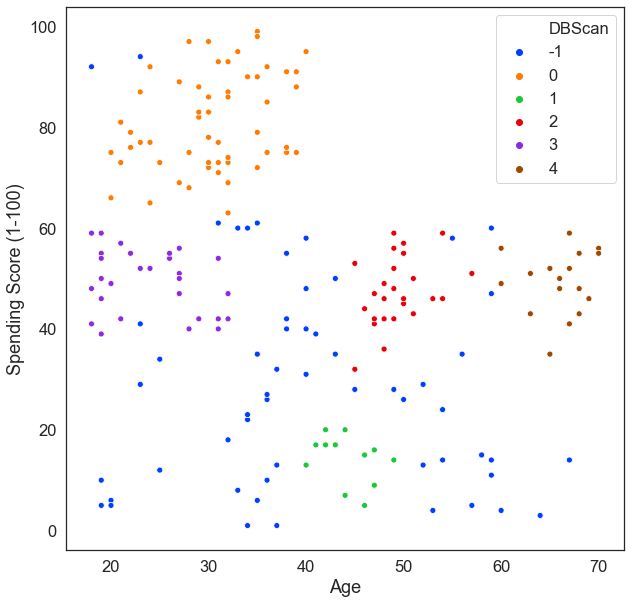

In [ ]:
# DBScan
plt.figure(figsize = (10, 10))
sns.set_context(context = 'notebook', font_scale=1.5)
sns.scatterplot(
    x = 'Age',
    y = 'Spending Score',
    hue = 'DBScan',
    data = df,
    palette='bright')

plt.xlabel('Age')
plt.ylabel('Spending Score (1-100)');

## **Summary**

Dalam kasus segmentasi customer dengan menggunakan 2 features, yaitu 'Age' dan 'Spending Score', didapat bahwa metode K-Means menghasilkan hasil clustering yang paling optimal, jika ditinjau pada silhouette score yang didapat.

Silhouette score:
- Kmeans 2 clusters = 0.47
- Hierarchical (Average) 3 clusters = 0.42
- DBSCAN 5 clusters = 0.28

Berdasarkan metode K-Means, customer hanya disegmentasikan ke dalam 2 cluster berbeda, yaitu:
1. Cluster customer berumur 18 hingga 40 tahun, yang mana spending score-nya bervariasi dari sekitar 25 hingga 99.
2. Cluster customer berumur 30 hingga 70 tahun dan spending score tertinggi hanya sekitar 60.

Berdasarkan metode Hierarchical Clustering, customer hanya disegmentasikan ke dalam 3 cluster berbeda, yaitu:
1. Cluster customer berumur 18 hingga 40 tahun, yang mana spending score-nya bervariasi dari sekitar 25 hingga 99.
2. Cluster customer berumur 18 hingga 26 tahun, yang mana spending score-nya bervariasi dari sekitar 0 hingga 15.
3. Cluster customer berumur 32 hingga 70 tahun dan spending score tertinggi hanya sekitar 60.

Jika mengacu pada metode Hierarchical Clustering, dapat disimpulkan bahwa cluster pertama adalah cluster dengan customer dengan rentang umur remaja hingga dewasa yang lebih sering berbelanja atau melakukan transaksi di mall tersebut.

## **Latihan Time Series (ARIMA)**<br>
**Gunakan dataset AirPassengers**

1. Lakukan EDA.
2. Cek apakah data sudah stasioner? Jika belum, lakukan differencing.
3. Gunakan ADF test untuk mengecek stasioneritas data secara perhitungan statistik.
4. Cari model ARIMA terbaik melalui grafik ACF & PACF.
5. Buat modelnya dan lakukan forecasting untuk periode 1 tahun.